# FakeRank
Hrishi Dharam, Eilam Levitov  
March 16, 2017  

### Abstract 


In [1]:
import numpy as np
import util # Linear Algebra/PageRank
from util import PersonalizedPageRank as ppr 
import misc # Random libraries and graphing
import matplotlib.pyplot as plt
import ipywidgets as widgets
from __future__ import division
%matplotlib inline  

In [2]:
# 1) Google Search
inputText = widgets.Text()
inputText

In [3]:
inputText.value.decode('unicode_escape').encode('ascii','ignore')

'trump russia'

In [4]:
links = misc.gSearch(str(inputText.value.decode('unicode_escape').encode('ascii','ignore')))

Retrieving pages...
http://www.cnn.com/2017/03/14/politics/wiretapping-congressional-investigation/
http://www.nbcnews.com/news/us-news/clinton-ally-says-smoke-no-fire-no-russia-trump-collusion-n734176
http://www.cbsnews.com/news/democratic-super-pac-goes-after-trumps-russia-connections/
http://www.politico.com/story/2017/03/russia-trump-takeaways-hearings-236100
http://www.politico.com/story/2017/03/lindsey-graham-trump-russia-236043
https://www.washingtonpost.com/blogs/right-turn/wp/2017/03/14/look-whos-going-after-trumps-russia-scandal/
http://www.bbc.com/news/world-us-canada-38966846
https://www.bloomberg.com/news/articles/2017-03-16/behind-trump-s-russia-romance-there-s-a-tower-full-of-oligarchs
http://billmoyers.com/story/the-trump-resistance-plan-a-timeline-russia-and-president-trump/
https://en.wikipedia.org/wiki/Donald_Trump%E2%80%93Russia_dossier
http://www.huffingtonpost.com/entry/trump-russia-timeline_us_58c2eec2e4b054a0ea6a744e
http://www.theblaze.com/news/2017/03/14/break

In [5]:
print len(links)

49


In [6]:
# 2) Create Similarity Matrix (might take a minute)
mtx = misc.simMatrix(links)

Generating similarity vectors...
Similarity Matrix computed
52.6877758503


[[ 0.          0.07692308  0.         ...,  0.          0.          0.        ]
 [ 0.02439024  0.          0.         ...,  0.02439024  0.02439024
   0.02439024]
 [ 0.          0.          0.         ...,  0.2         0.          0.        ]
 ..., 
 [ 0.          0.02857143  0.02857143 ...,  0.          0.02857143  0.        ]
 [ 0.          0.02631579  0.         ...,  0.02631579  0.          0.02631579]
 [ 0.          0.03030303  0.         ...,  0.          0.03030303  0.        ]]


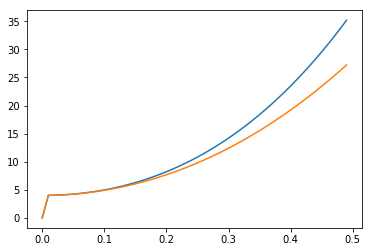

choose alpha=.05
4.08340904312


In [7]:
# 3) Graphing PageRank and Cluster Variance
clustering = ppr(adjacencyMatrix = mtx, alpha = .1)
print clustering.transitionMatrix
v = [clustering.prVariance(alpha) for alpha in np.arange(0,.5,.01)]
plt.plot(np.arange(0, .5, .01), v)
plt.plot(np.arange(0, .5, .01), [clustering.clusterVariance(alpha) for alpha in np.arange(0, .5, .01)])
plt.show()
print 'choose alpha=.05'
print clustering.prVariance(.03)

In [8]:
# 4) Finding stationary disribution in terms of Personalized PageRank Vectors
stationaryDist = 1/clustering.n * sum(clustering.getHubVectors())
print stationaryDist

[ 0.00854653  0.02573343  0.00370457  0.02566222  0.02504082  0.00429293
  0.02316384  0.02012315  0.02443033  0.02259899  0.02791358  0.02377571
  0.02195621  0.01220317  0.0269684   0.00186737  0.02577241  0.02594003
  0.01891252  0.02632102  0.0232718   0.02316515  0.02563846  0.0213403
  0.02698977  0.02632102  0.01465646  0.02566222  0.01537212  0.02762726
  0.02505586  0.02443033  0.01950824  0.02012892  0.02317443  0.02387617
  0.02567417  0.02316624  0.02635504  0.01770595  0.00611962  0.02567894
  0.02627588  0.02132895  0.02205357  0.02377571  0.02072017]


In [9]:
# 5) Finding central articles 

#Fix k, the number of centers you want to find
k=5
#fix c, the number of samples
c = 10
#Fix alpha of your choice
alpha = .1
n = len(stationaryDist)
samples = np.random.choice(n, p=stationaryDist, size=(c, k))

bestCenters = samples[0]
bestVal = float("inf")
for centers in samples:
    centerValue = clustering.centerSetEvaluation(centers, alpha)
    setClusterVariance = clustering.setClusterVariance(centers, alpha)
    prVariance = clustering.prVariance(alpha)
    clusterVariance = clustering.clusterVariance(alpha)
    
    x = centerValue - prVariance
    y = setClusterVariance - clusterVariance
    
    val = abs(x) + abs(y)
    if val < bestVal:
        bestCenters = centers
        bestVal = val
    

In [10]:
print "These are the representative articles: "
for i in bestCenters:
    print links[i]

These are the representative articles: 
https://www.usnews.com/opinion/thomas-jefferson-street/articles/2017-03-14/democrats-must-connect-donald-trump-white-nationalism-and-russia
http://www.slate.com/articles/news_and_politics/cover_story/2016/10/was_a_server_registered_to_the_trump_organization_communicating_with_russia.html
http://www.politicususa.com/2017/03/14/trump-republicans-pressure-congressional-gop-investigate-trump-russia.html
http://freebeacon.com/politics/the-mainstream-media-word-brain-comes-trump-russia/
http://billmoyers.com/story/the-trump-resistance-plan-a-timeline-russia-and-president-trump/
